# Import Required Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
from google.colab import drive

# Mount Google Drive and Specify Dataset Directory

In [2]:
from google.colab import drive
drive.mount('/content/drive')

train_dir = '/content/drive/My Drive/Dataset/Dataset Fish Species/Types of fish/FishImgDataset/train'
validation_dir = '/content/drive/My Drive/Dataset/Dataset Fish Species/Types of fish/FishImgDataset/val'


Mounted at /content/drive


# Preprocessing Data

## Create Image Data Generator

In [3]:
# Image Data Generator
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 8801 images belonging to 31 classes.
Found 2751 images belonging to 31 classes.


# Build CNN Model

In [4]:
# Build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(150, 150, 3)),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3)),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128),
    LeakyReLU(alpha=0.1),

    Dense(train_generator.num_classes, activation='sigmoid')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Add Callback for Early Stopping

In [5]:
# Callback untuk early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the Model

In [6]:
# Train the Model
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/15
276/276 [==============================] - 3427s 12s/step - loss: 2.6502 - accuracy: 0.3038 - val_loss: 1.7091 - val_accuracy: 0.5358
Epoch 2/15
276/276 [==============================] - 539s 2s/step - loss: 1.3679 - accuracy: 0.6240 - val_loss: 0.6896 - val_accuracy: 0.8270
Epoch 3/15
276/276 [==============================] - 504s 2s/step - loss: 0.4336 - accuracy: 0.8799 - val_loss: 0.2922 - val_accuracy: 0.9371
Epoch 4/15
276/276 [==============================] - 504s 2s/step - loss: 0.1256 - accuracy: 0.9701 - val_loss: 0.2751 - val_accuracy: 0.9440
Epoch 5/15
276/276 [==============================] - 494s 2s/step - loss: 0.0525 - accuracy: 0.9902 - val_loss: 0.2528 - val_accuracy: 0.9564
Epoch 6/15
276/276 [==============================] - 467s 2s/step - loss: 0.0543 - accuracy: 0.9878 - val_loss: 0.2950 - val_accuracy: 0.9444
Epoch 7/15
276/276 [==============================] - 479s 2s/step - loss: 0.0372 - accuracy: 0.9922 - val_loss: 0.2857 - val_accuracy: 0.95

# Evaluate the Model

In [7]:
# Evaluasi Model
train_loss, train_accuracy = model.evaluate(train_generator)
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

86/86 [==============================] - 51s 592ms/step - loss: 0.2528 - accuracy: 0.9564
Training Accuracy: 99.63%
Validation Accuracy: 95.64%


# Create Visualization of Model Results

## Plot Learning Curve

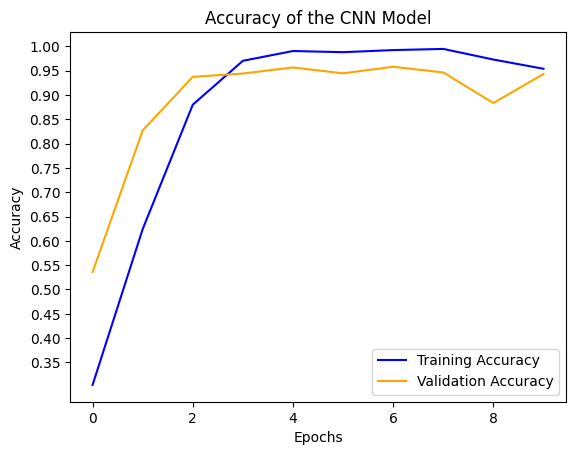

In [12]:
# Plot history
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Accuracy of the CNN Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Customize y-axis ticks
plt.yticks(np.arange(0.35, 1.05, 0.05))  # From 0.35 to 1.00 with steps of 0.05

plt.show()

## Plot Loss Curve

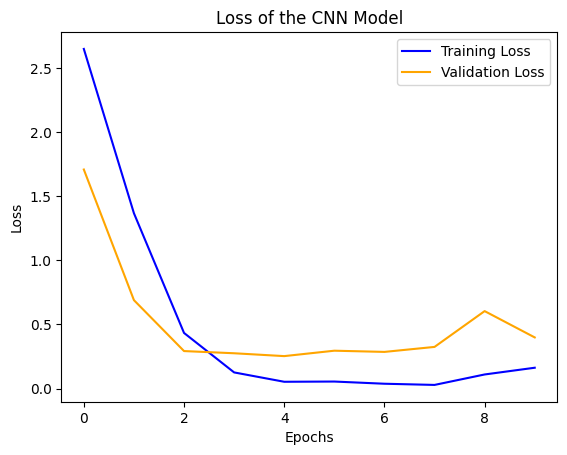

In [17]:
# Plot Loss Curve
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss of the CNN Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Testing new data on the CNN model

## Import Libraries

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import numpy as np
import seaborn as sns


## Define Data Path and Prepare Image Data Generator

In [42]:
# Define Data Path for New Data
new_data_dir = '/content/drive/My Drive/Dataset/Dataset Fish Species/Types of fish/FishImgDataset/test'

# Prepare Image Data Generator for New Data
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(
    new_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 1760 images belonging to 31 classes.


## Evaluate the Model on New Testing Data

In [43]:
# Evaluate the Model on New Data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss on new test data: {test_loss}')
print(f'Test Accuracy on new test data: {test_accuracy * 100:.2f}%')


55/55 [==============================] - 49s 878ms/step - loss: 0.5263 - accuracy: 0.9080
Test Loss on new test data: 0.5263442993164062
Test Accuracy on new test data: 90.80%


## Predict on New Testing Data

In [44]:
# Predict on New Data
test_generator.reset()
Y_pred = model.predict(test_generator, test_generator.samples // test_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes


55/55 [==============================] - 45s 794ms/step


## Classification Report on New Testing Data

In [45]:
# Evaluate and Print Results
# Classification Report
class_labels = list(test_generator.class_indices.keys())
print('\nClassification Report for testing new data with the CNN model')
print(classification_report(y_true, y_pred, target_names=class_labels))



Classification Report for testing new data with the CNN model
                       precision    recall  f1-score   support

               Bangus       0.79      0.88      0.83        34
        Big Head Carp       0.86      0.86      0.86        43
   Black Spotted Barb       1.00      0.88      0.93        40
              Catfish       0.92      0.90      0.91        62
       Climbing Perch       0.83      0.83      0.83        30
 Fourfinger Threadfin       0.88      0.92      0.90        38
       Freshwater Eel       0.94      0.89      0.92        55
       Glass Perchlet       0.96      0.92      0.94        77
                 Goby       0.79      0.96      0.87       124
            Gold Fish       0.95      1.00      0.98        41
              Gourami       0.91      0.94      0.92        63
           Grass Carp       0.93      0.97      0.95       238
 Green Spotted Puffer       0.95      0.86      0.90        22
          Indian Carp       0.85      0.89      0.87  

## Creating visualization of the confusion matrix on new testing data

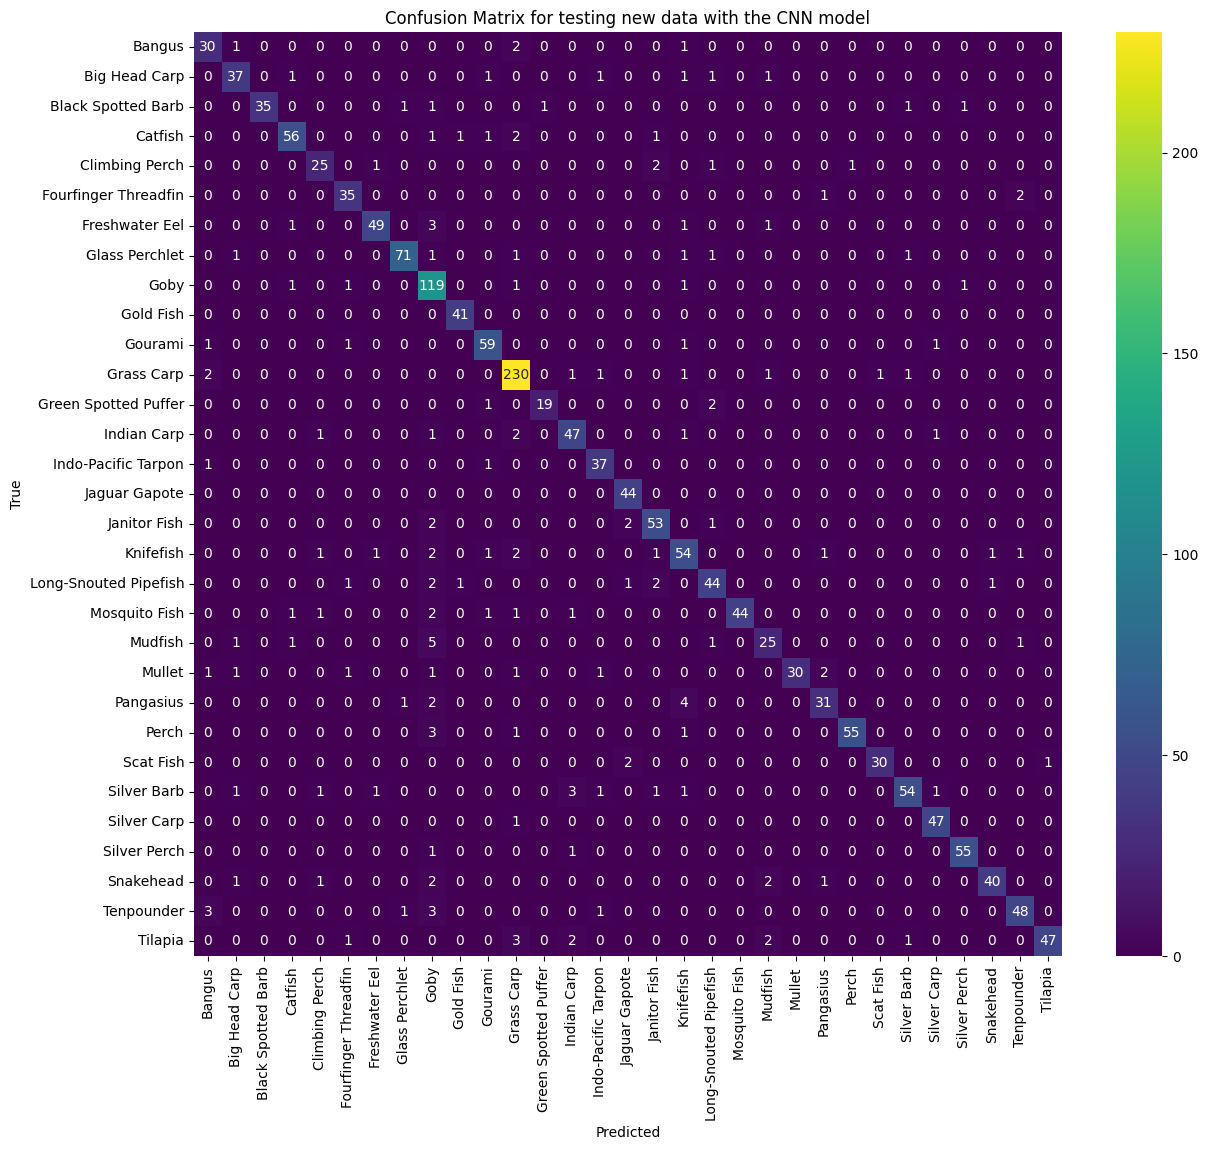

In [46]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(14, 12))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap="viridis")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for testing new data with the CNN model')
plt.show()


## Creating visualization of AUC-ROC Curves on new testing data


AUC-ROC on new test data: 0.97


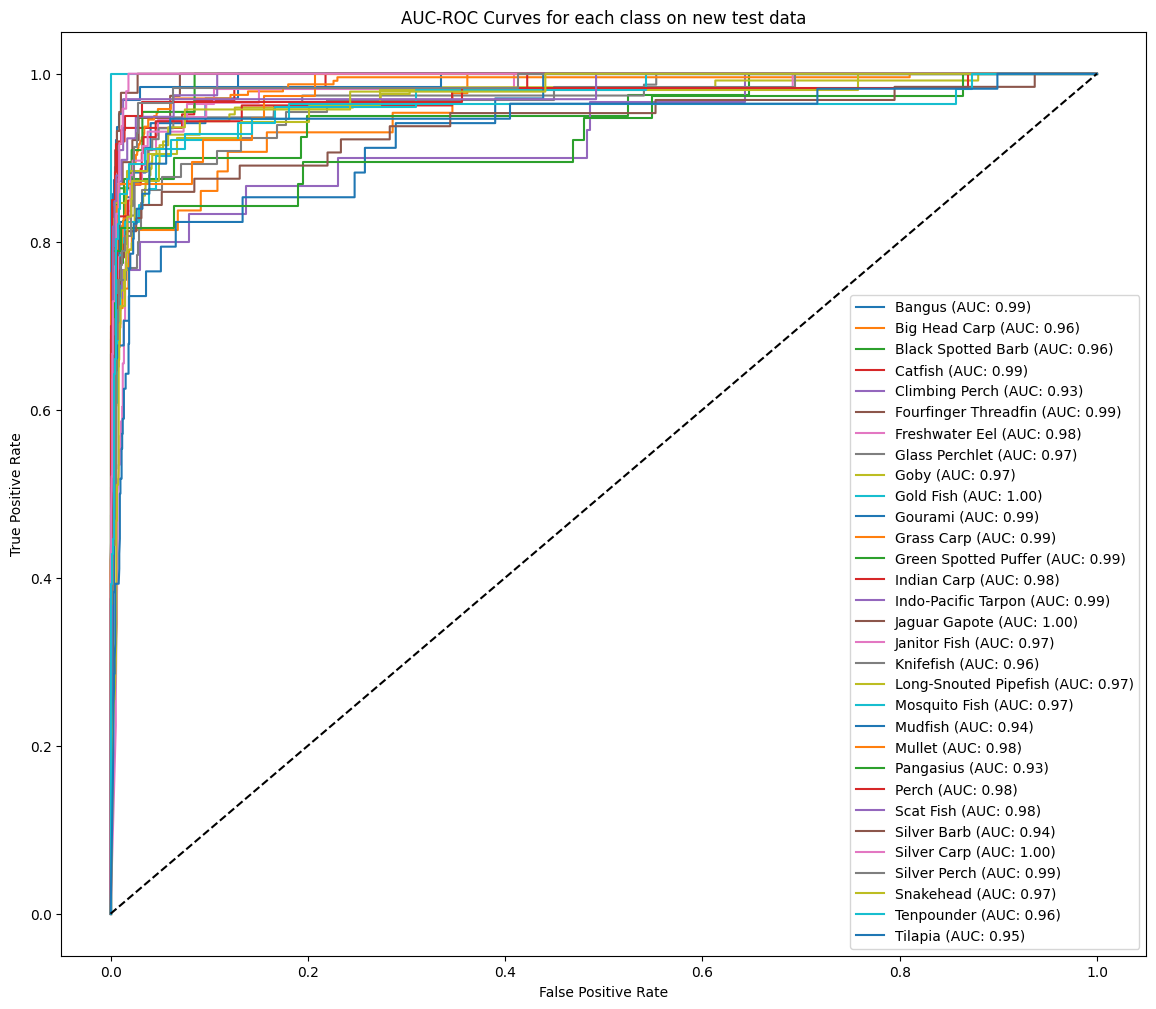

In [47]:
# Binarize the labels for AUC-ROC
y_true_binarized = label_binarize(y_true, classes=np.arange(len(class_labels)))

# Compute the AUC-ROC for each class
roc_auc = roc_auc_score(y_true_binarized, Y_pred, average='macro')
print(f'\nAUC-ROC on new test data: {roc_auc:.2f}')

# Plotting AUC-ROC curves for each class
plt.figure(figsize=(14, 12))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(y_true_binarized[:, i], Y_pred[:, i])
    plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC: {roc_auc_score(y_true_binarized[:, i], Y_pred[:, i]):.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curves for each class on new test data')
plt.legend(loc='best')
plt.show()

# Save Model Machine Learning

In [60]:
# Save the model after testing
model_path = '/content/drive/My Drive/classification_of_fish_species.h5'
model.save(model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Machine Learning Model Simulation for Fish Type Classification

In [86]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from google.colab import files
from IPython.display import display, Image
import numpy as np

In [87]:
# Function to load and preprocess image
def load_and_preprocess_image(image_path, target_size=(150, 150)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize
    return img_array

# Function to predict fish type
def predict_fish_type(model, image_path, class_labels):
    img_array = load_and_preprocess_image(image_path)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    fish_name = class_labels[predicted_class[0]]
    return fish_name

# Load the trained model
model_path = '/content/drive/My Drive/classification_of_fish_species.h5'
model = load_model(model_path)

Saving istockphoto-1204552660-612x612.jpg to istockphoto-1204552660-612x612 (1).jpg


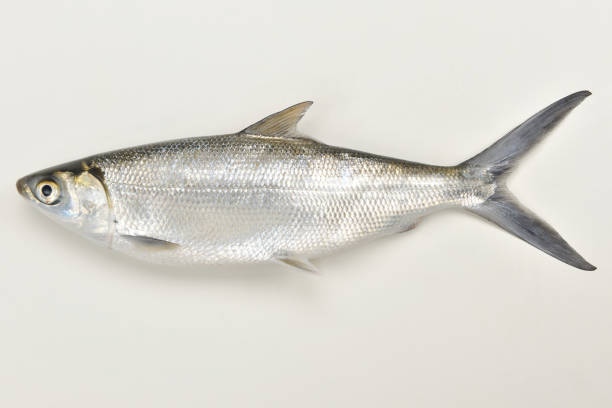

1/1 [==============================] - 0s 59ms/step
The classification of that type of fish is: Bangus


In [96]:
# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Function to input image and display prediction
def input_and_predict_image():
    # Upload image file
    uploaded = files.upload()

    for filename in uploaded.keys():
        # Displaying image
        display(Image(filename=filename))

        # Get fish name prediction
        fish_name = predict_fish_type(model, filename, class_labels)
        print(f'The classification of that type of fish is: {fish_name}')

# Get predicted fish name
input_and_predict_image()
